![](http://)**Image Classification with fastai**

In [1]:
from fastai.vision import *
import fastai; fastai.__version__
import numpy as np

**Let's see how fastai handles MNIST**

In [1]:
# path = untar_data(URLs.MNIST_SAMPLE)
# data = ImageDataBunch.from_folder(path)
# learn = cnn_learner(data, models.resnet18, metrics=accuracy)
# learn.fit(1)

NameError: name 'untar_data' is not defined

**Classify images of brown bears, panda bears, tigers, lions, and leopards**

In [2]:
# We can verify that we don’t have any corrupt images using the verify_images method.
import os
path = Path(r'../input/animals/animals')
for folder in ('brown bears', 'panda bears', 'tigers','lions','leopards'):
    print(folder)
    verify_images(os.path.join(path, folder), delete=True, max_size=500)


brown bears


panda bears


tigers


lions


leopards


In [3]:
path

PosixPath('../input/animals/animals')

In [4]:

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=path, valid_pct=0.2,
                                  ds_tfms=get_transforms(),bs=15 ,size=224, num_workers=0).normalize(imagenet_stats)
# Setting num_workers=0 prevents crushing!

In [5]:
data.classes

['brown bears', 'leopards', 'lions', 'panda bears', 'tigers']

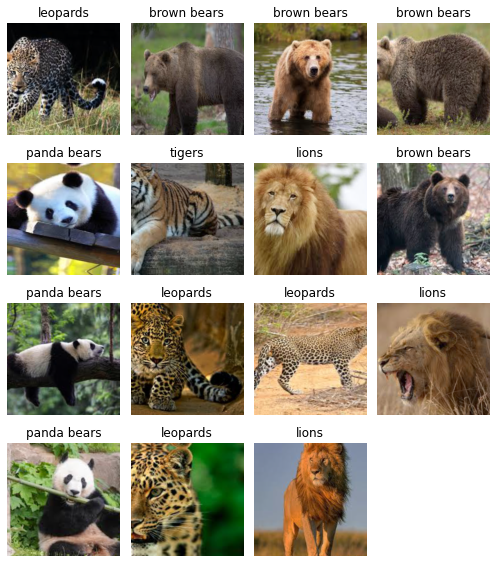

In [6]:
data.show_batch(rows=4, figsize=(7, 8))

In [ ]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34, metrics=error_rate)
# The created model uses the resnet34 architecture, with weights pretrained on the imagenet dataset.
# By default, only the fully connected layers at the top are unfrozen (can be trained), 
# which if you are familiar with transfer learning makes perfect sense.

In [ ]:
# # defaults.device = torch.device('cuda') # makes sure the gpu is used
# learn.fit_one_cycle(3)

In [ ]:
# # Will take too long without GPU
# learn.unfreeze() # must be done before calling lr_find
# learn.lr_find()
# learn.recorder.plot()

In [ ]:
# Might take too long without GPU
learn.fit_one_cycle(4, max_lr=slice(3e-5, 3e-4))

In [ ]:
# learn.save('..animal-detection-stage-1')

[](http://)## Interpretation

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(8, figsize=(15,15))
# Show images in `top_losses` along with their prediction, actual, loss, and probability of actual class.

In [ ]:
learn.summary()